## Convolutional Model

In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


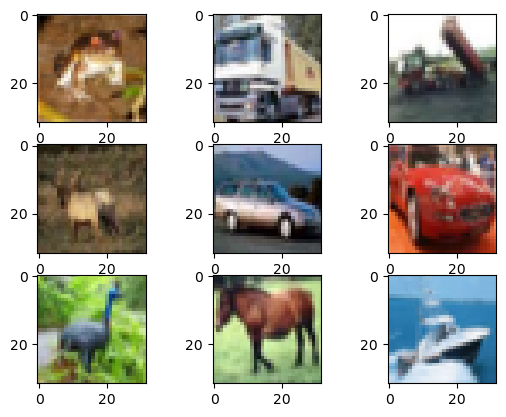

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))


for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
pyplot.show()

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
print(type(X_train))

<class 'numpy.ndarray'>


In [12]:
nClasses = 10
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.7)
print( X_test.shape, Y_test.shape)
print( X_train.shape, Y_train.shape)
print( X_val.shape, Y_val.shape)

(10000, 32, 32, 3) (10000, 1)
(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)


In [13]:
print(Y_val[0])
nClasses = 10
Y_val = to_categorical(Y_val, nClasses)
Y_test = to_categorical(Y_test, nClasses)
Y_train = to_categorical(Y_train, nClasses)
print(Y_val[0])

[7]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

## Convolutional Model

In [17]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3,3), activation='sigmoid' ,input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(4,4), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation = "sigmoid"))
model.add(Dense(90, activation = "sigmoid"))

model.add(Dense(nClasses, activation = 'softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        1552      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)              

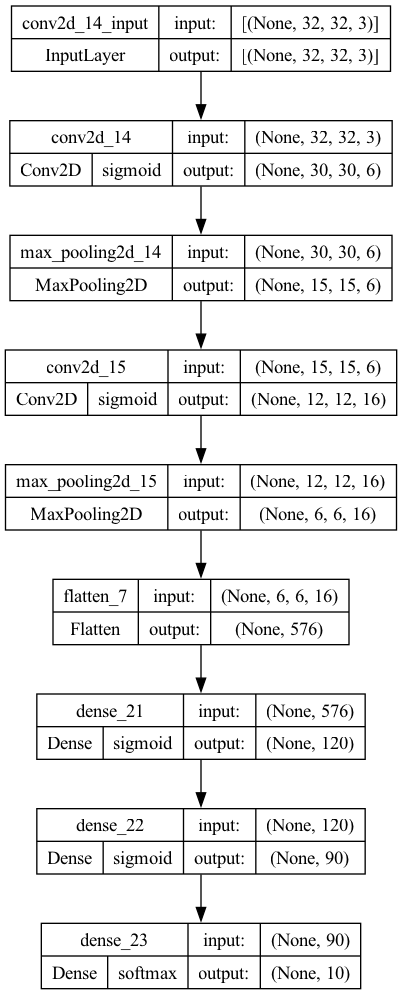

In [98]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='images/mnist_conv_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

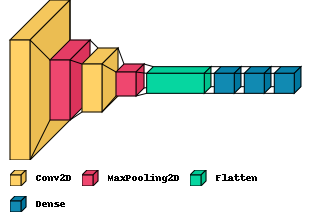

In [99]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [100]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_error',
    metrics = ['accuracy']
)

In [101]:
model_history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, batch_size=128, verbose=2)

Epoch 1/150


2023-10-12 13:12:40.847509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-12 13:12:47.726499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


274/274 - 9s - loss: 0.0862 - accuracy: 0.1988 - val_loss: 0.0821 - val_accuracy: 0.2763 - 9s/epoch - 32ms/step
Epoch 2/150
274/274 - 3s - loss: 0.0792 - accuracy: 0.3267 - val_loss: 0.0768 - val_accuracy: 0.3634 - 3s/epoch - 13ms/step
Epoch 3/150
274/274 - 4s - loss: 0.0741 - accuracy: 0.3889 - val_loss: 0.0724 - val_accuracy: 0.4087 - 4s/epoch - 13ms/step
Epoch 4/150
274/274 - 4s - loss: 0.0713 - accuracy: 0.4199 - val_loss: 0.0697 - val_accuracy: 0.4301 - 4s/epoch - 14ms/step
Epoch 5/150
274/274 - 4s - loss: 0.0687 - accuracy: 0.4458 - val_loss: 0.0682 - val_accuracy: 0.4467 - 4s/epoch - 13ms/step
Epoch 6/150
274/274 - 4s - loss: 0.0665 - accuracy: 0.4674 - val_loss: 0.0661 - val_accuracy: 0.4691 - 4s/epoch - 13ms/step
Epoch 7/150
274/274 - 4s - loss: 0.0649 - accuracy: 0.4874 - val_loss: 0.0635 - val_accuracy: 0.4972 - 4s/epoch - 14ms/step
Epoch 8/150
274/274 - 4s - loss: 0.0634 - accuracy: 0.4999 - val_loss: 0.0627 - val_accuracy: 0.5039 - 4s/epoch - 13ms/step
Epoch 9/150
274/274 

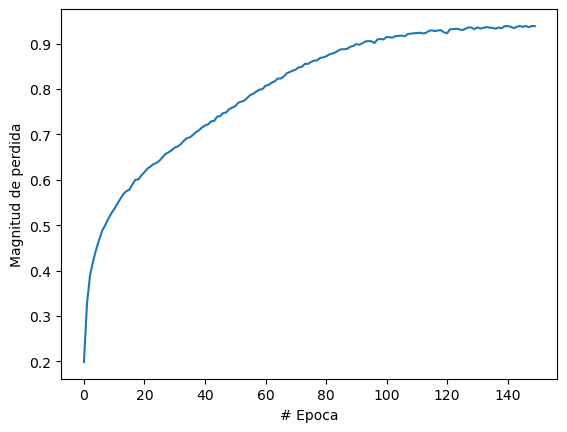

In [102]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(model_history.history["accuracy"])

In [103]:
import numpy as np

y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred_label = np.argmax(y_pred, axis = 1)
print(y_pred_label)

y_real = np.argmax(Y_test,axis = 1)
print(y_real)

2023-10-12 13:21:41.749546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
(10000, 10)
[6 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


In [104]:
from sklearn.metrics import classification_report, confusion_matrix

# as I've trained my model on MNIST as odd or even (binary classes)
target_names = ['avion', 'auto','ave', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camioneta']

# get predict prob and label
y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

reporte = classification_report(np.argmax(Y_test, axis=1), y_pred, target_names=target_names)

print(reporte)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

       avion       0.64      0.68      0.66      1000
        auto       0.74      0.73      0.73      1000
         ave       0.49      0.43      0.46      1000
        gato       0.37      0.35      0.36      1000
      venado       0.51      0.52      0.51      1000
       perro       0.45      0.52      0.48      1000
        rana       0.62      0.69      0.65      1000
     caballo       0.64      0.63      0.64      1000
       barco       0.73      0.67      0.70      1000
   camioneta       0.68      0.62      0.65      1000

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.58     10000
weighted avg       0.59      0.58      0.58     10000



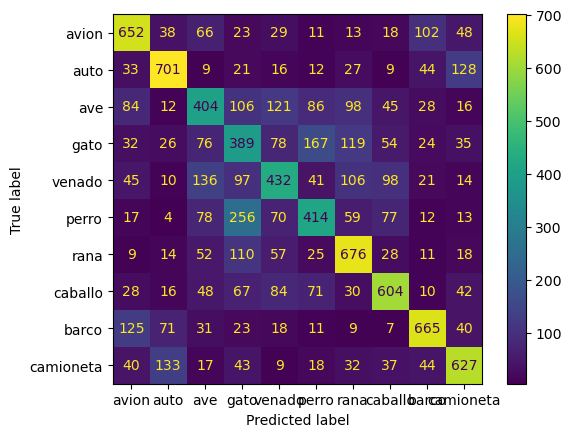

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_real, y_pred_label, display_labels=target_names)

## Lenet5

In [79]:
model_Lenet = Sequential()
model_Lenet.add(Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid' ,input_shape=(32,32,3)))
model_Lenet.add(MaxPooling2D(pool_size=(2,2)))

model_Lenet.add(Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid'))
model_Lenet.add(MaxPooling2D(pool_size=(2,2)))

model_Lenet.add(Flatten())

model_Lenet.add(Dense(120, activation = "sigmoid"))
model_Lenet.add(Dense(84, activation = "sigmoid"))

model_Lenet.add(Dense(nClasses, activation = 'softmax'))

model_Lenet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

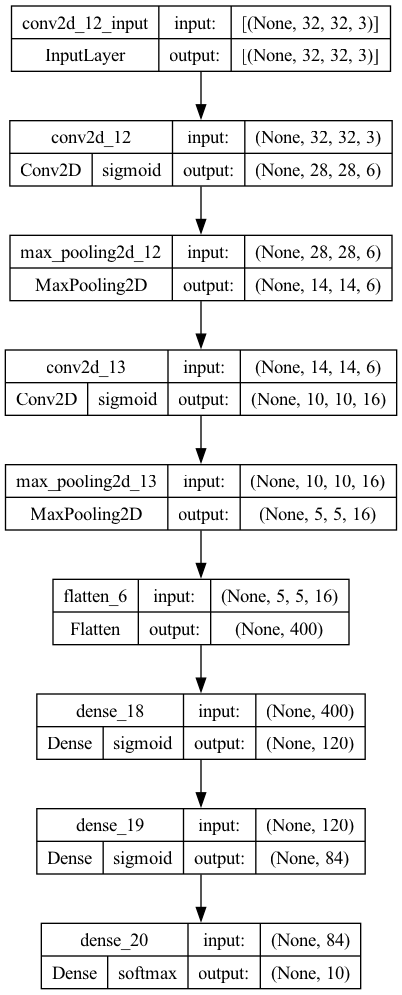

In [80]:
from tensorflow.keras.utils import plot_model

plot_model(model_Lenet, to_file='images/cifar_lenet_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

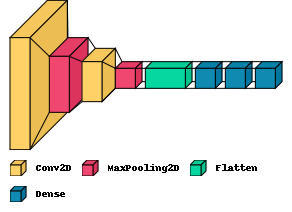

In [81]:
import visualkeras
visualkeras.layered_view(model_Lenet, legend=True)

In [82]:
model_Lenet.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_error',
    metrics = ['accuracy']
)

In [83]:
model_Lenet_history = model_Lenet.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, batch_size=128, verbose=2)

Epoch 1/150


2023-10-12 12:46:49.679194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-12 12:46:58.397358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


274/274 - 11s - loss: 0.0837 - accuracy: 0.2483 - val_loss: 0.0776 - val_accuracy: 0.3458 - 11s/epoch - 41ms/step
Epoch 2/150
274/274 - 4s - loss: 0.0760 - accuracy: 0.3666 - val_loss: 0.0752 - val_accuracy: 0.3772 - 4s/epoch - 16ms/step
Epoch 3/150
274/274 - 4s - loss: 0.0736 - accuracy: 0.3909 - val_loss: 0.0726 - val_accuracy: 0.4012 - 4s/epoch - 16ms/step
Epoch 4/150
274/274 - 4s - loss: 0.0720 - accuracy: 0.4103 - val_loss: 0.0711 - val_accuracy: 0.4211 - 4s/epoch - 15ms/step
Epoch 5/150
274/274 - 4s - loss: 0.0704 - accuracy: 0.4287 - val_loss: 0.0719 - val_accuracy: 0.4177 - 4s/epoch - 15ms/step
Epoch 6/150
274/274 - 4s - loss: 0.0691 - accuracy: 0.4455 - val_loss: 0.0681 - val_accuracy: 0.4524 - 4s/epoch - 15ms/step
Epoch 7/150
274/274 - 4s - loss: 0.0676 - accuracy: 0.4614 - val_loss: 0.0673 - val_accuracy: 0.4587 - 4s/epoch - 15ms/step
Epoch 8/150
274/274 - 4s - loss: 0.0663 - accuracy: 0.4730 - val_loss: 0.0685 - val_accuracy: 0.4530 - 4s/epoch - 15ms/step
Epoch 9/150
274/27

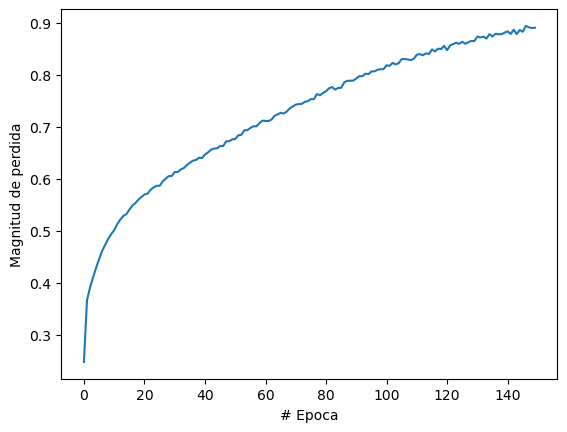

In [84]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(model_Lenet_history.history["accuracy"])

In [85]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred_label = np.argmax(y_pred, axis = 1)
print(y_pred_label)

y_real = np.argmax(Y_test,axis = 1)
print(Y_test)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 1 4]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [86]:
from sklearn.metrics import classification_report, confusion_matrix

# as I've trained my model on MNIST as odd or even (binary classes)
target_names = ['avion', 'auto','ave', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camioneta']

# get predict prob and label
y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

reporte = classification_report(np.argmax(Y_test, axis=1), y_pred, target_names=target_names)

print(reporte)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

       avion       0.61      0.65      0.63      1000
        auto       0.68      0.70      0.69      1000
         ave       0.44      0.40      0.42      1000
        gato       0.34      0.39      0.36      1000
      venado       0.47      0.43      0.45      1000
       perro       0.48      0.41      0.45      1000
        rana       0.58      0.68      0.62      1000
     caballo       0.62      0.60      0.61      1000
       barco       0.69      0.67      0.68      1000
   camioneta       0.64      0.63      0.63      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



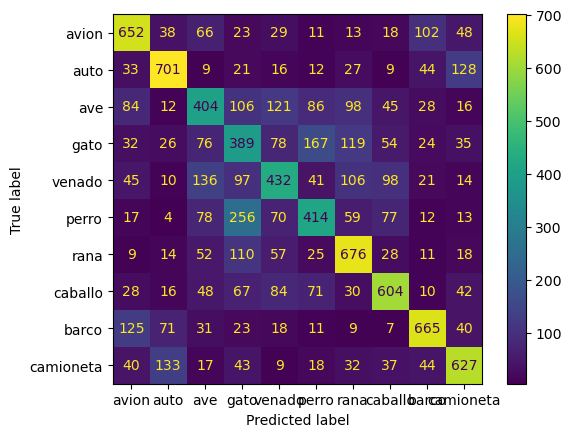

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_real, y_pred_label, display_labels=target_names)